事先说明，以下绘图数据皆为虚拟数据

In [1]:
import sys
import os
sys.path.append(os.path.abspath('../'))
import json
from datetime import datetime,timedelta
import dateutil.parser
import dateutil.rrule
import numpy as np
import pandas as pd
import xarray as xr
from metgrs import Utils
import io
import math
import types
import glob
import matplotlib as mpl
from joblib import Parallel,delayed
from metgrs import CloudRadar
import matplotlib.pyplot as plt

In [2]:
datapath='../datas/'

# 读取云雷达FFT数据

In [3]:
fs=glob.glob(datapath+'/CloudRadarFiles/20251015/CLOUD_FFT_M/*')

In [4]:
ds=CloudRadar.readSingleFFTData(fs[0])

In [5]:
ds.Data

<xarray.Dataset> Size: 5MB
Dimensions:  (time: 1, height: 669, FFT_index: 256, dtype: 2, index: 256)
Coordinates:
  * time     (time) datetime64[ns] 8B 2025-10-14T16:00:00
  * height   (height) int64 5kB 0 30 60 90 120 ... 19920 19950 19980 20010 20040
  * dtype    (dtype) <U5 40B 'flag' 'value'
  * index    (index) int64 2kB 0 1 2 3 4 5 6 7 ... 249 250 251 252 253 254 255
Dimensions without coordinates: FFT_index
Data variables:
    FFT0     (time, height, FFT_index, dtype) float64 3MB -320.0 ... 173.1
    FFT1     (time, height, FFT_index, dtype) float64 3MB -320.0 ... 173.6
Attributes:
    time_count:      1
    height_count:    669
    time_reference:  UTC
    height_unit:     meter

# 读取云雷达基数据


In [13]:
fs=glob.glob(datapath+'/CloudRadarFiles/20241204/CLOUD_RAW_M/*')

In [14]:
ds=CloudRadar.readBaseDatas(fs)

In [15]:
ds.Datas

<xarray.Dataset> Size: 85MB
Dimensions:   (time: 1440, height: 669)
Coordinates:
  * time      (time) datetime64[ns] 12kB 2024-12-03T16:00:00 ... 2024-12-04T1...
  * height    (height) int64 5kB 0 30 60 90 120 ... 19950 19980 20010 20040
Data variables:
    LDR       (time, height) float64 8MB nan nan nan nan nan ... nan nan nan nan
    CF        (time, height) float64 8MB nan nan nan nan nan ... nan nan nan nan
    Z1        (time, height) float64 8MB nan nan nan nan ... nan nan nan nan
    SNR1      (time, height) float64 8MB nan nan nan nan ... nan nan nan nan
    SNR2      (time, height) float64 8MB nan nan nan nan nan ... nan nan nan nan
    W1        (time, height) float64 8MB nan nan nan nan 0.1 ... nan nan nan nan
    Z2        (time, height) float64 8MB nan nan nan nan nan ... nan nan nan nan
    Reserved  (time, height) float64 8MB nan nan nan nan nan ... nan nan nan nan
    W2        (time, height) float64 8MB nan nan nan nan nan ... nan nan nan nan
    V2        (time, height) float64 8MB nan nan nan nan nan ... nan nan nan nan
    V1        (time, height) float64 8MB nan nan nan nan 0.0 ... nan nan nan nan
Attributes:
    time_count:      1440
    height_count:    669
    time_reference:  UTC
    height_unit:     meter

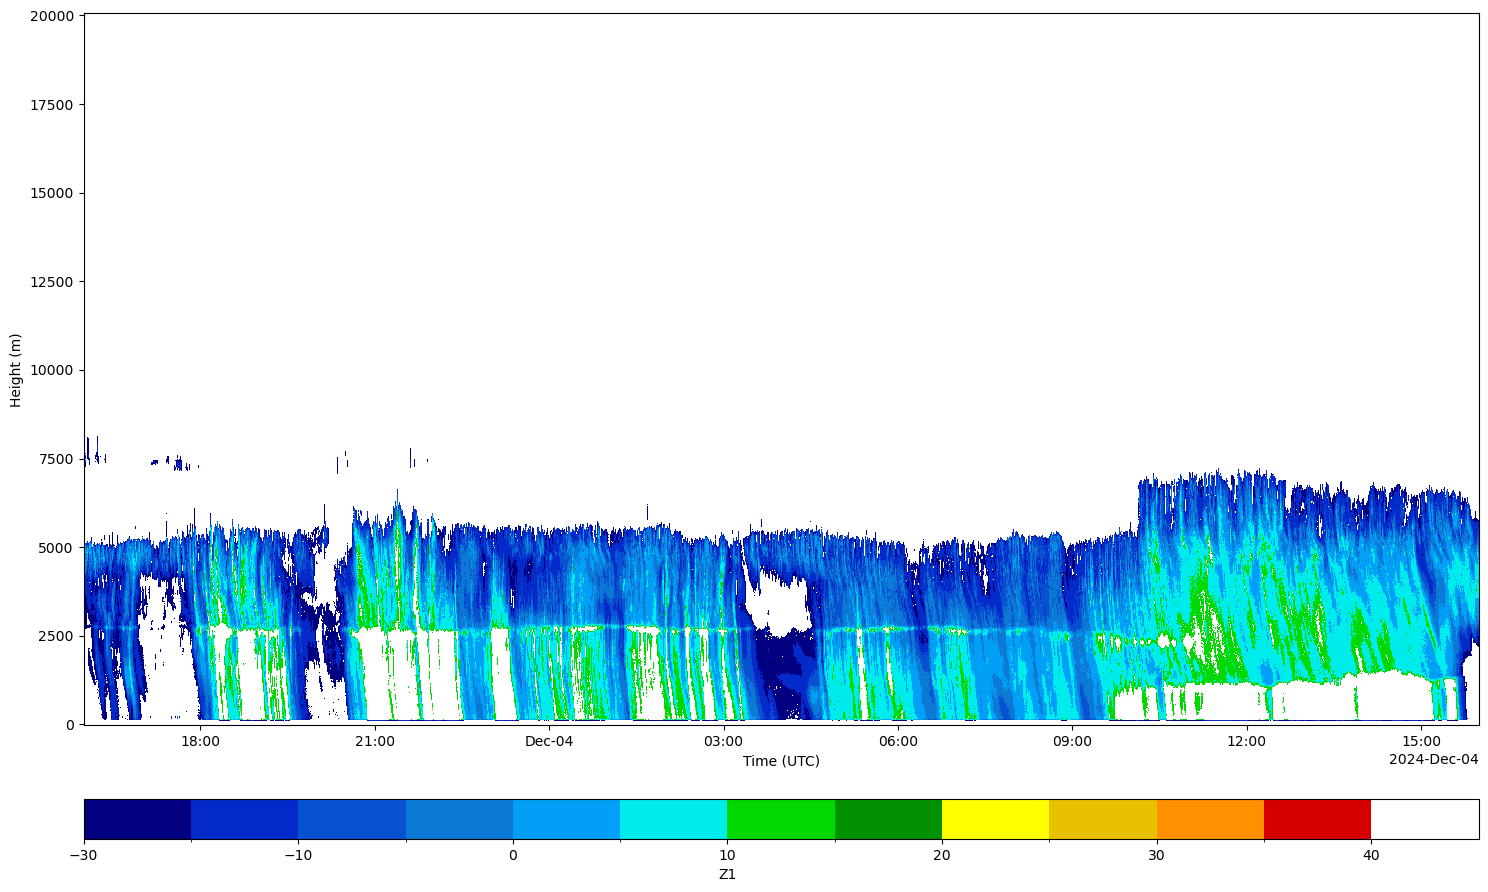

In [16]:
ds.plot('Z1')

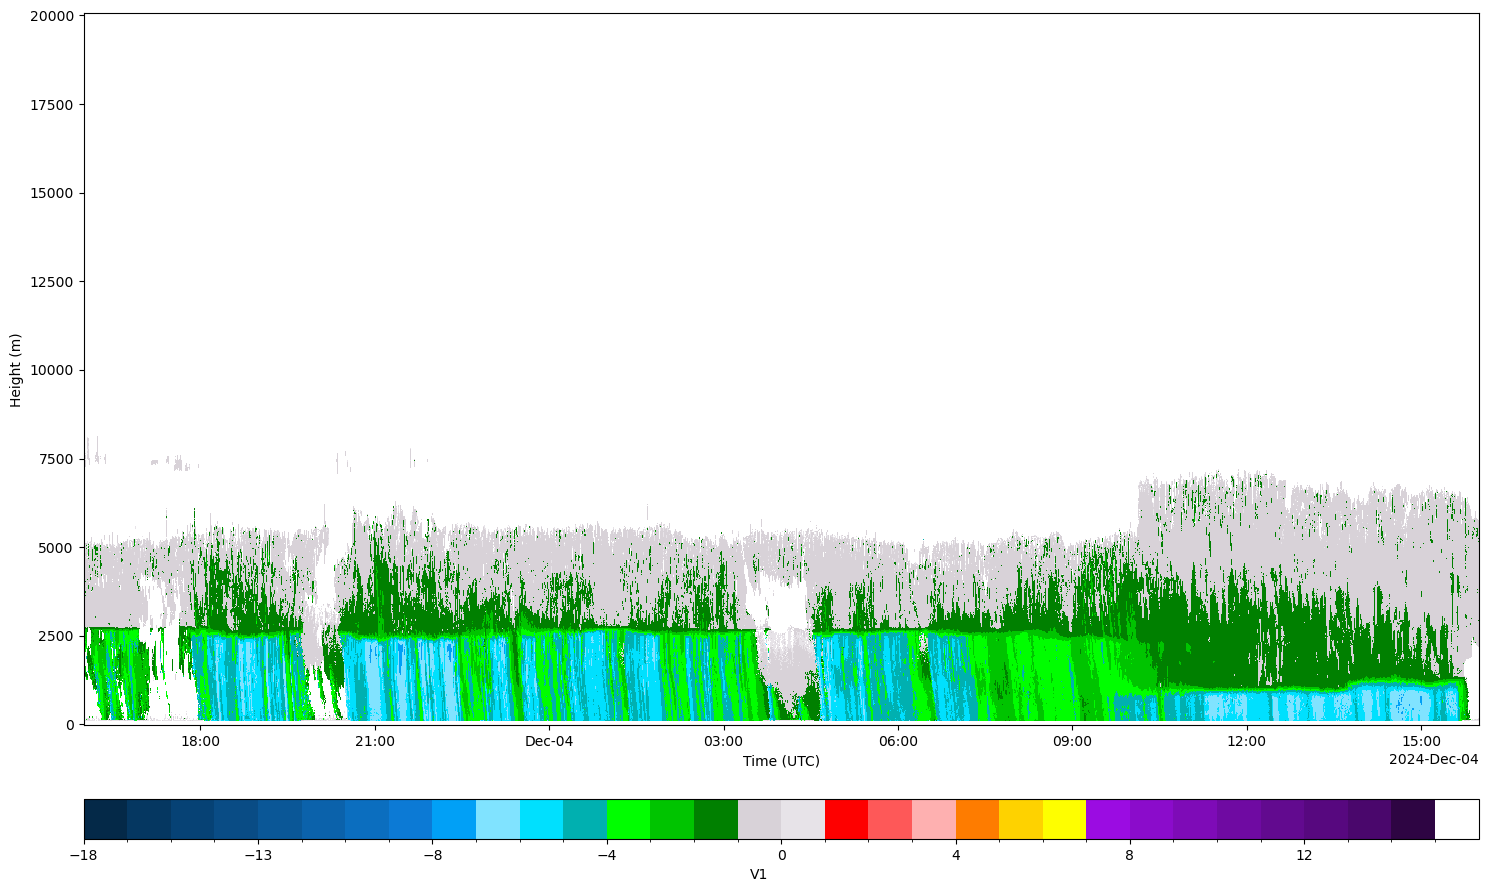

In [17]:
ds.plot('V1')

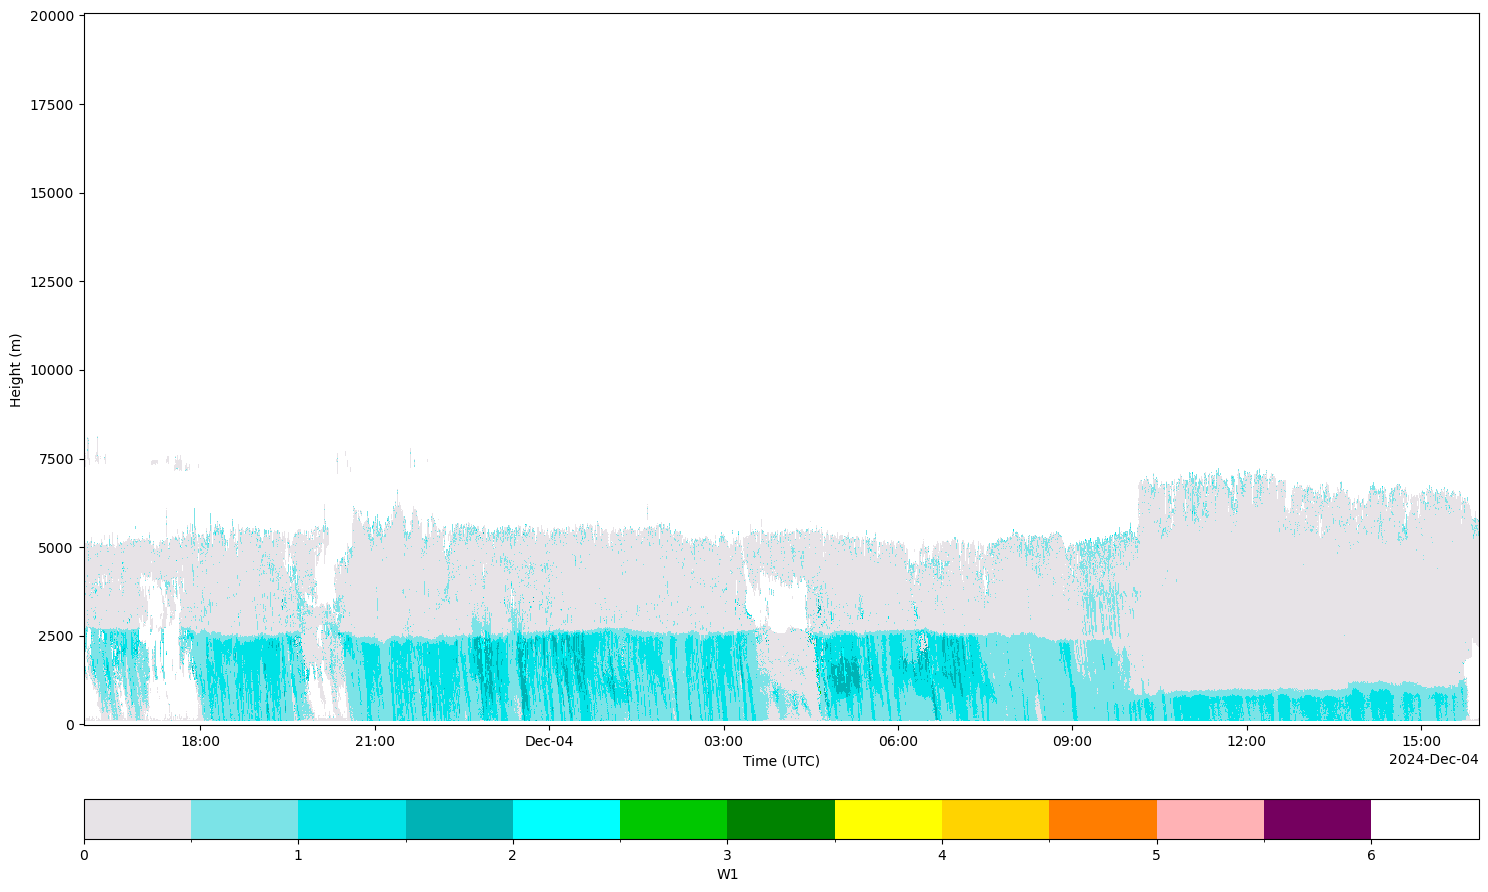

In [18]:
ds.plot('W1')

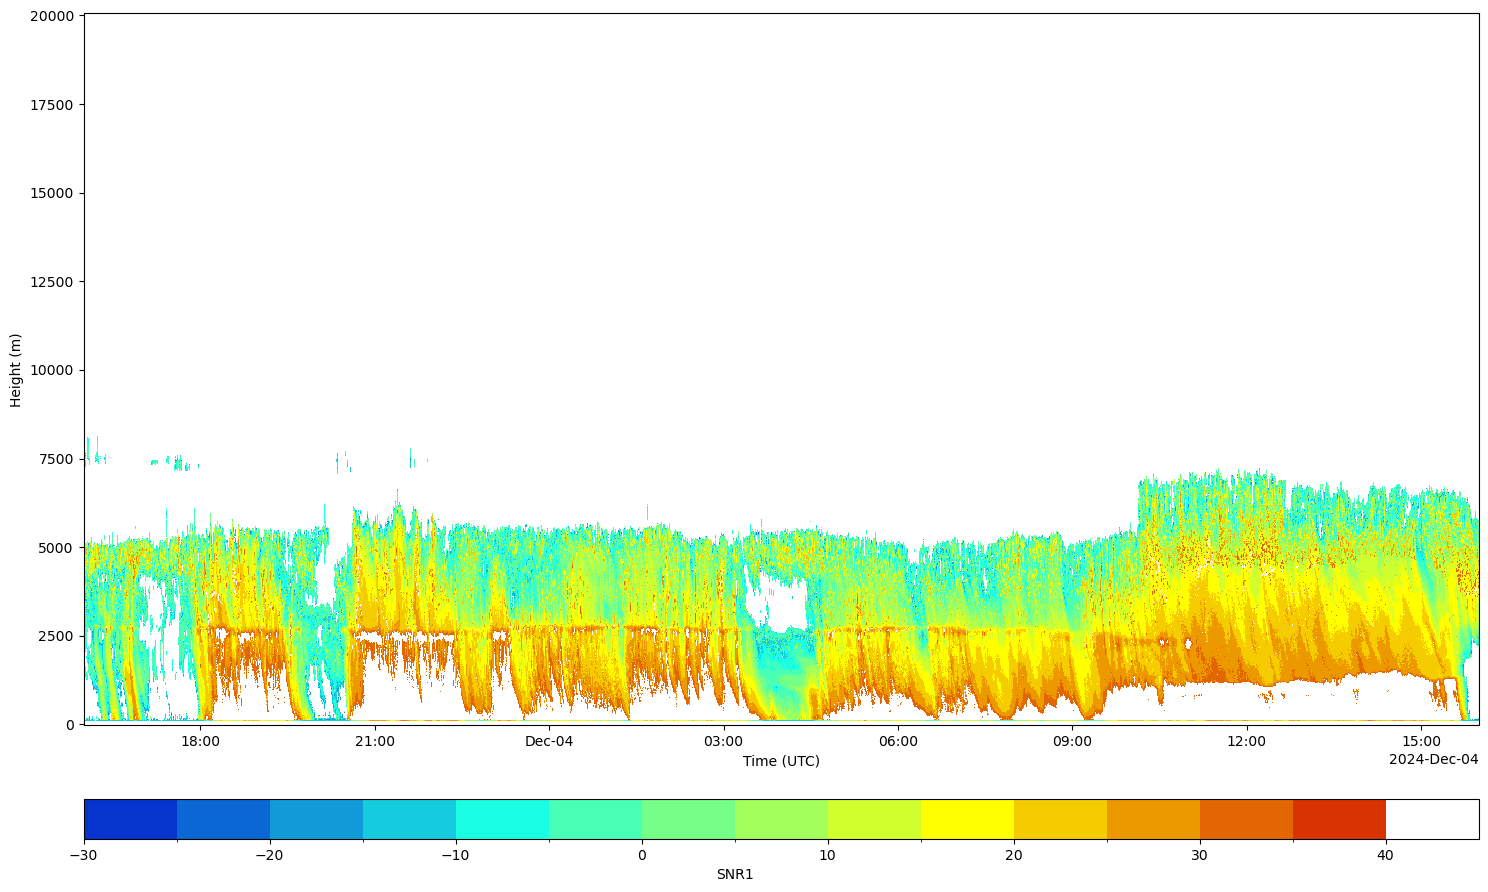

In [19]:
ds.plot('SNR1')